**Partie 1: Importation des bibliothèques**

Travail effectué:

Cette section initialise l'environnement de travail en important toutes les bibliothèques nécessaires pour l'analyse de données, la visualisation, le machine learning et le prétraitement des données. On configure également les paramètres d'affichage pour une meilleure visualisation des résultats.

Justification technique:

*   Pandas et NumPy pour la manipulation des données

*  Matplotlib et Seaborn pour la visualisation
*   Scikit-learn pour les algorithmes de machine learning


*  LabelEncoder pour le prétraitement des variables catégorielles

*   Désactivation des warnings pour un affichage plus propre





In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

**Partie 2: Chargement et exploration des données**

Cette section permet de charger votre dataset depuis votre ordinateur vers Google Colab. Si aucun fichier n'est uploadé, un dataset d'exemple est créé automatiquement.

In [2]:
# =============================================================================
# CHARGEMENT ET EXPLORATION DES DONNÉES
# =============================================================================

print("=" * 60)
print("CHARGEMENT ET EXPLORATION DU DATASET")
print("=" * 60)

# Chargement du dataset depuis l'ordinateur local
from google.colab import files

print("📤 Veuillez sélectionner le fichier du dataset à importer...")
uploaded = files.upload()

# Vérification des fichiers uploadés
if not uploaded:
    print("❌ Aucun fichier n'a été importé. Veuillez réexécuter cette cellule.")
else:
    print("✅ Fichier(s) importé(s) avec succès!")
    for filename in uploaded.keys():
        file_size = len(uploaded[filename])
        print(f"   - {filename} ({file_size} bytes)")

# Lecture des données
try:
    # Récupération du nom du premier fichier uploadé
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(filename)

    print(f"\n📊 Dataset chargé avec succès: {filename}")
    print(f"   - Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")

except Exception as e:
    print(f"❌ Erreur lors du chargement du fichier: {e}")
    print("📝 Création d'un dataset exemple pour la démonstration...")

    # Création d'un dataset exemple plus réaliste
    np.random.seed(42)
    n_samples = 200

    # Heures d'étude (normalement distribuées avec une moyenne de 5h)
    study_hours = np.random.normal(5, 2, n_samples)
    study_hours = np.clip(study_hours, 1, 10)  # Entre 1 et 10 heures

    # Heures de sommeil (normalement distribuées avec une moyenne de 7h)
    sleep_hours = np.random.normal(7, 1.5, n_samples)
    sleep_hours = np.clip(sleep_hours, 4, 10)  # Entre 4 et 10 heures

    # Participation en classe (scale de 0 à 10)
    participation = np.random.randint(0, 11, n_samples)

    # Score final calculé avec une relation réaliste
    final_score = (
        30 +  # Score de base
        5 * study_hours +  # Impact des heures d'étude
        2 * sleep_hours +  # Impact du sommeil
        1.5 * participation +  # Impact de la participation
        np.random.normal(0, 8, n_samples)  # Bruit aléatoire
    )
    final_score = np.clip(final_score, 0, 100)  # Scores entre 0 et 100

    # Création du DataFrame
    data = {
        'study_hours': study_hours.round(1),
        'sleep_hours': sleep_hours.round(1),
        'participation': participation,
        'final_score': final_score.round(1)
    }
    df = pd.DataFrame(data)

    print("✅ Dataset exemple créé avec succès!")

CHARGEMENT ET EXPLORATION DU DATASET
📤 Veuillez sélectionner le fichier du dataset à importer...


Saving student_performance.csv to student_performance.csv
✅ Fichier(s) importé(s) avec succès!
   - student_performance.csv (641949 bytes)

📊 Dataset chargé avec succès: student_performance.csv
   - Dimensions: 6607 lignes × 20 colonnes


**Partie 3: Aperçu des données**

Travail effectué:

Exploration initiale du dataset avec affichage des premières et dernières lignes. Cette étape cruciale permet de se familiariser avec la structure des données et d'identifier d'éventuels problèmes visuellement.

Justification technique:


*  Utilisation de display() avec styling pour une présentation professionnelle

*  Affichage des 5 premières et 5 dernières observations
*  Formatage HTML pour améliorer la lisibilité



In [3]:
# =============================================================================
# APERÇU DES DONNÉES
# =============================================================================

print("\n" + "=" * 60)
print("APERÇU DES DONNÉES")
print("=" * 60)

print("\n1. PREMIÈRES LIGNES DU DATASET:")
print("-" * 40)
display(df.head().style.set_caption("5 premières observations").set_table_styles([
    {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]}
]))

print("\n2. DERNIÈRES LIGNES DU DATASET:")
print("-" * 40)
display(df.tail().style.set_caption("5 dernières observations").set_table_styles([
    {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]}
]))


APERÇU DES DONNÉES

1. PREMIÈRES LIGNES DU DATASET:
----------------------------------------


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



2. DERNIÈRES LIGNES DU DATASET:
----------------------------------------


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


**Partie 4: Informations techniques sur le dataset**

Analyse approfondie de la structure du dataset avec examen des types de données, du nombre de valeurs non-nulles et de l'utilisation mémoire. Cette étape est essentielle pour comprendre la composition technique des données.

In [4]:
# =============================================================================
# INFORMATIONS SUR LE DATASET
# =============================================================================

print("\n" + "=" * 60)
print("INFORMATIONS TECHNIQUES")
print("=" * 60)

print("\n3. INFORMATIONS SUR LES COLONNES:")
print("-" * 40)
print(f"{'Colonne':<15} {'Type':<10} {'Valeurs non-nulles'}")
print("-" * 45)
for col in df.columns:
    non_null_count = df[col].notnull().sum()
    print(f"{col:<15} {str(df[col].dtype):<10} {non_null_count}/{len(df)}")

print(f"\n4. MÉMOIRE UTILISÉE: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")


INFORMATIONS TECHNIQUES

3. INFORMATIONS SUR LES COLONNES:
----------------------------------------
Colonne         Type       Valeurs non-nulles
---------------------------------------------
Hours_Studied   int64      6607/6607
Attendance      int64      6607/6607
Parental_Involvement object     6607/6607
Access_to_Resources object     6607/6607
Extracurricular_Activities object     6607/6607
Sleep_Hours     int64      6607/6607
Previous_Scores int64      6607/6607
Motivation_Level object     6607/6607
Internet_Access object     6607/6607
Tutoring_Sessions int64      6607/6607
Family_Income   object     6607/6607
Teacher_Quality object     6529/6607
School_Type     object     6607/6607
Peer_Influence  object     6607/6607
Physical_Activity int64      6607/6607
Learning_Disabilities object     6607/6607
Parental_Education_Level object     6517/6607
Distance_from_Home object     6540/6607
Gender          object     6607/6607
Exam_Score      int64      6607/6607

4. MÉMOIRE UTILISÉE: 48

**Partie 5: Statistiques descriptives**

Cette section fournit des statistiques descriptives détaillées pour chaque variable du dataset.

In [5]:
# =============================================================================
# STATISTIQUES DESCRIPTIVES
# =============================================================================

print("\n" + "=" * 60)
print("STATISTIQUES DESCRIPTIVES")
print("=" * 60)

print("\n5. RÉSUMÉ STATISTIQUE:")
print("-" * 40)

# Création d'un résumé statistique détaillé
stats = df.describe().T
stats['missing'] = df.isnull().sum()
stats['missing_%'] = (df.isnull().sum() / len(df) * 100).round(2)
stats['unique'] = df.nunique()

display(stats.style.format({
    'mean': '{:.2f}',
    'std': '{:.2f}',
    'min': '{:.2f}',
    '25%': '{:.2f}',
    '50%': '{:.2f}',
    '75%': '{:.2f}',
    'max': '{:.2f}',
    'missing_%': '{:.1f}%'
}).set_caption("Statistiques descriptives détaillées").set_table_styles([
    {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]}
]))


STATISTIQUES DESCRIPTIVES

5. RÉSUMÉ STATISTIQUE:
----------------------------------------


,count,mean,std,min,25%,50%,75%,max,missing,missing_%,unique
Hours_Studied,6607.000000,19.98,5.99,1.00,16.00,20.00,24.00,44.00,0,0.0%,41
Attendance,6607.000000,79.98,11.55,60.00,70.00,80.00,90.00,100.00,0,0.0%,41
Sleep_Hours,6607.000000,7.03,1.47,4.00,6.00,7.00,8.00,10.00,0,0.0%,7
Previous_Scores,6607.000000,75.07,14.40,50.00,63.00,75.00,88.00,100.00,0,0.0%,51
Tutoring_Sessions,6607.000000,1.49,1.23,0.00,1.00,1.00,2.00,8.00,0,0.0%,9
Physical_Activity,6607.000000,2.97,1.03,0.00,2.00,3.00,4.00,6.00,0,0.0%,7
Exam_Score,6607.000000,67.24,3.89,55.00,65.00,67.00,69.00,101.00,0,0.0%,45


**Partie 6: Vérification des valeurs manquantes**

Cette section identifie et présente les valeurs manquantes dans le dataset.

In [6]:
# =============================================================================
# VÉRIFICATION DES VALEURS MANQUANTES
# =============================================================================

print("\n" + "=" * 60)
print("VALEURS MANQUANTES")
print("=" * 60)

missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Valeurs manquantes': missing_values,
    'Pourcentage': missing_percent
})

if missing_df['Valeurs manquantes'].sum() == 0:
    print("✅ Aucune valeur manquante détectée dans le dataset.")
else:
    print(" Valeurs manquantes détectées:")
    display(missing_df[missing_df['Valeurs manquantes'] > 0].style.format({
        'Pourcentage': '{:.2f}%'
    }).set_caption("Valeurs manquantes par colonne").set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]}
    ]))


VALEURS MANQUANTES
⚠️  Valeurs manquantes détectées:


,Valeurs manquantes,Pourcentage
Teacher_Quality,78,1.18%
Parental_Education_Level,90,1.36%
Distance_from_Home,67,1.01%


**Partie 7: Analyse des types de données**

Cette section classe les variables en numériques et catégorielles.

In [11]:
# =============================================================================
# TYPES DE DONNÉES
# =============================================================================

print("\n" + "=" * 60)
print("TYPES DE DONNÉES")
print("=" * 60)

# Analyse des types de données
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # Added missing closing parenthesis
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n6. COLONNES NUMÉRIQUES ({len(numeric_cols)}):")
print("   " + ", ".join(numeric_cols))

print(f"\n7. COLONNES CATÉGORIELLES ({len(categorical_cols)}):")
if categorical_cols:
    print("   " + ", ".join(categorical_cols))
else:
    print("   Aucune colonne catégorielle détectée.")


TYPES DE DONNÉES

6. COLONNES NUMÉRIQUES (7):
   Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, Exam_Score

7. COLONNES CATÉGORIELLES (13):
   Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Motivation_Level, Internet_Access, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender


**Partie 8: Résumé du dataset**

Cette section fournit un résumé complet du dataset avec identification automatique de la variable cible.

In [12]:
# =============================================================================
# RÉSUMÉ FINAL
# =============================================================================

print("\n" + "=" * 60)
print("RÉSUMÉ DU DATASET")
print("=" * 60)

# Déterminer le nom de la variable cible (en fonction du dataset)
if 'Exam_Score' in df.columns:
    target_col = 'Exam_Score'
elif 'final_score' in df.columns:
    target_col = 'final_score'
else:
    # Trouver une colonne qui pourrait être la cible
    possible_targets = ['score', 'mark', 'grade', 'result', 'performance']
    target_col = None
    for col in df.columns:
        if any(word in col.lower() for word in possible_targets):
            target_col = col
            break
    if target_col is None:
        target_col = df.columns[-1]  # Utiliser la dernière colonne par défaut

feature_cols = [col for col in df.columns if col != target_col]

print(f"""
📋 Informations générales:
   - Total d'observations: {df.shape[0]:,}
   - Total de variables: {df.shape[1]}
   - Variables numériques: {len(numeric_cols)}
   - Variables catégorielles: {len(categorical_cols)}
   - Valeurs manquantes: {df.isnull().sum().sum()}
   - Doublons: {df.duplicated().sum()}

🎯 Variables clés identifiées:
   - Variable cible: '{target_col}' (à prédire)
   - Variables caractéristiques: {', '.join(feature_cols)}
""")


RÉSUMÉ DU DATASET

📋 Informations générales:
   - Total d'observations: 6,607
   - Total de variables: 20
   - Variables numériques: 7
   - Variables catégorielles: 13
   - Valeurs manquantes: 235
   - Doublons: 0

🎯 Variables clés identifiées:
   - Variable cible: 'Exam_Score' (à prédire)
   - Variables caractéristiques: Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender



**Partie 9: Visualisation des données avec Matplotlib**

Cette section crée des visualisations pour explorer les données et les relations entre variables.


VISUALISATION DES DONNÉES (MATPLOTLIB)


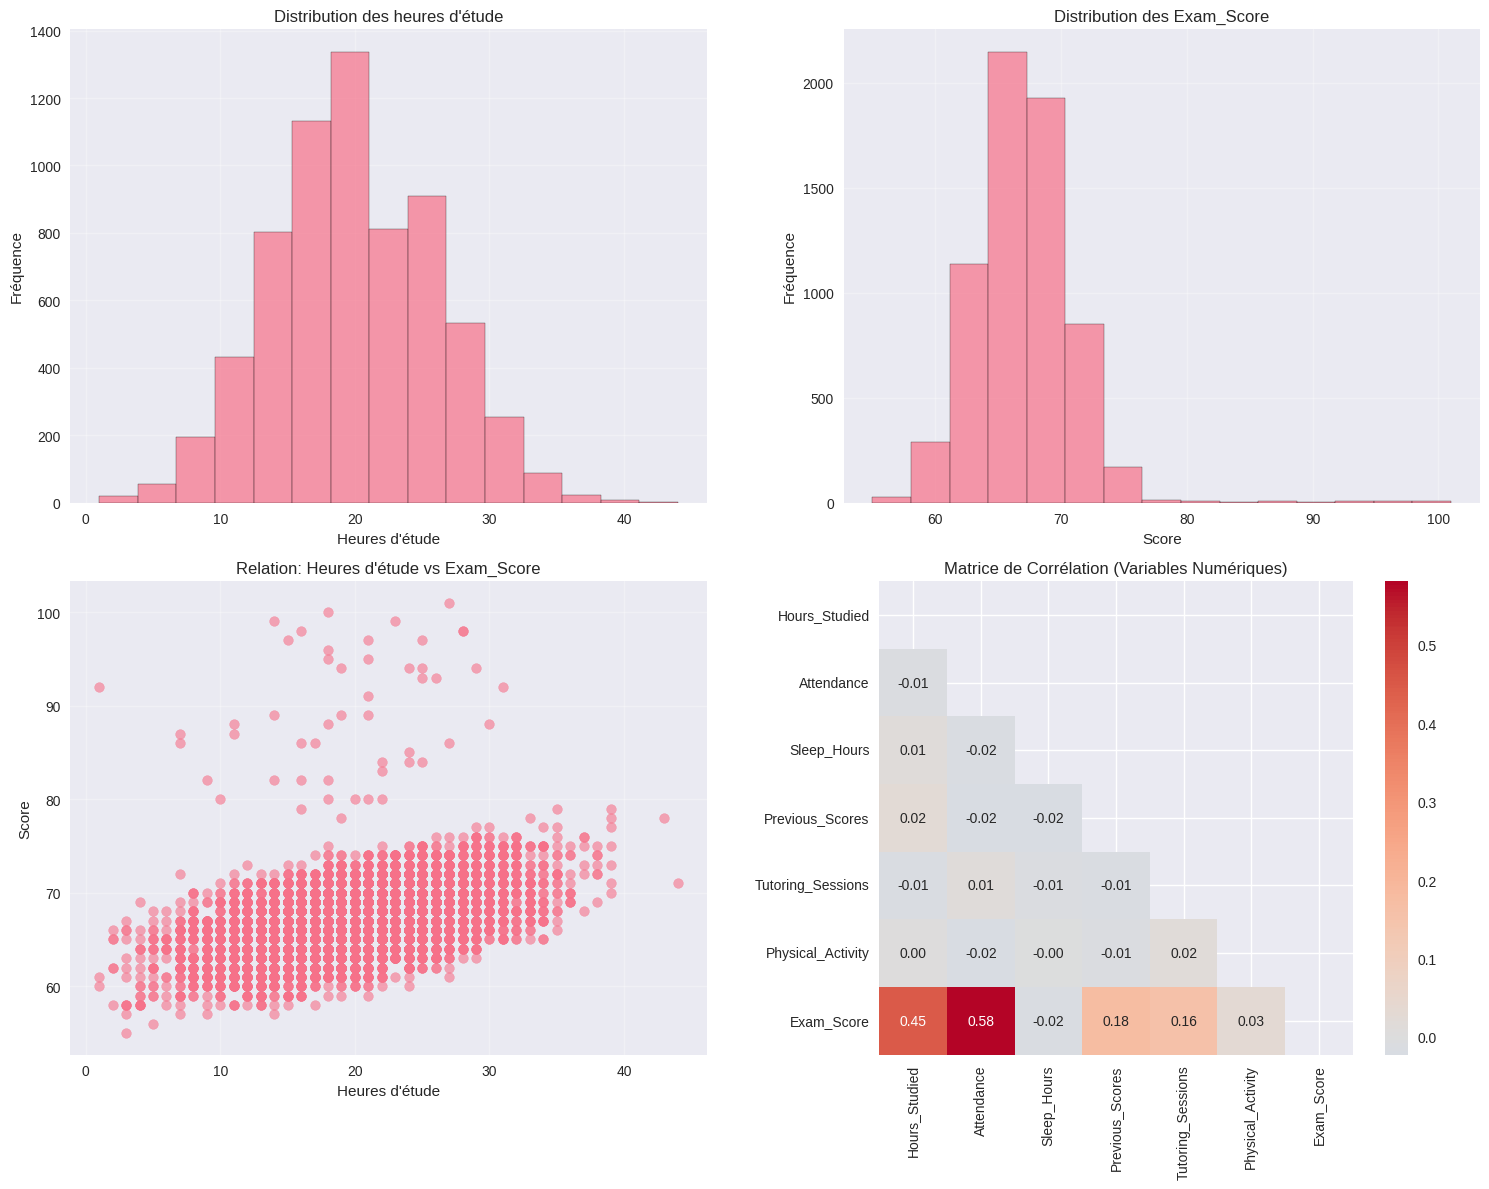

In [14]:
# =============================================================================
# VISUALISATION DES DONNÉES AVEC MATPLOTLIB
# =============================================================================

print("\n" + "=" * 60)
print("VISUALISATION DES DONNÉES (MATPLOTLIB)")
print("=" * 60)

# Déterminer la colonne d'heures d'étude
if 'Hours_Studied' in df.columns:
    study_col = 'Hours_Studied'
elif 'study_hours' in df.columns:
    study_col = 'study_hours'
else:
    # Trouver une colonne qui pourrait représenter les heures d'étude
    possible_study_cols = ['hour', 'study', 'time']
    study_col = None
    for col in df.columns:
        if any(word in col.lower() for word in possible_study_cols):
            study_col = col
            break
    if study_col is None:
        study_col = df.columns[0]  # Utiliser la première colonne par défaut

# Création des visualisations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution des heures d'étude
axes[0, 0].hist(df[study_col], bins=15, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Heures d\'étude')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].set_title('Distribution des heures d\'étude')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution des scores
axes[0, 1].hist(df[target_col], bins=15, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].set_title(f'Distribution des {target_col}')
axes[0, 1].grid(True, alpha=0.3)

# 3. Relation entre heures d'étude et scores
axes[1, 0].scatter(df[study_col], df[target_col], alpha=0.6)
axes[1, 0].set_xlabel('Heures d\'étude')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title(f'Relation: Heures d\'étude vs {target_col}')
axes[1, 0].grid(True, alpha=0.3)

# 4. Matrice de corrélation (seulement pour les variables numériques)
numeric_cols_for_corr = [col for col in numeric_cols if col != target_col]
if len(numeric_cols_for_corr) > 1:
    corr_matrix = df[numeric_cols_for_corr + [target_col]].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm',
                          center=0, square=True, ax=axes[1, 1], fmt='.2f')
    axes[1, 1].set_title('Matrice de Corrélation (Variables Numériques)')
else:
    axes[1, 1].text(0.5, 0.5, 'Pas assez de variables numériques\npour la matrice de corrélation',
                    ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Matrice de Corrélation')

plt.tight_layout()
plt.show()


**Partie 10: Nettoyage et prétraitement des données**

Cette section nettoie les données en gérant les valeurs manquantes et en encodant les variables catégorielles.

In [16]:
# =============================================================================
# NETTOYAGE ET PRÉTRAITEMENT DES DONNÉES
# =============================================================================

print("\n" + "=" * 60)
print("NETTOYAGE ET PRÉTRAITEMENT DES DONNÉES")
print("=" * 60)

# Copie du dataframe pour la manipulation
df_clean = df.copy()

# Traitement des valeurs manquantes
missing_cols = df_clean.columns[df_clean.isnull().any()].tolist()
if missing_cols:
    print("🔍 Traitement des valeurs manquantes:")
    for col in missing_cols:
        if df_clean[col].dtype == 'object':
            # Pour les variables catégorielles, remplacer par le mode
            mode_val = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_val, inplace=True)
            print(f"   - {col}: valeurs manquantes remplacées par le mode '{mode_val}'")
        else:
            # Pour les variables numériques, remplacer par la médiane
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"   - {col}: valeurs manquantes remplacées par la médiane {median_val:.2f}")

# Encodage des variables catégorielles
label_encoders = {}
for col in categorical_cols:
    if col in df_clean.columns:
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))
        label_encoders[col] = le
        print(f"   - {col}: encodée avec LabelEncoder")



NETTOYAGE ET PRÉTRAITEMENT DES DONNÉES
🔍 Traitement des valeurs manquantes:
   - Teacher_Quality: valeurs manquantes remplacées par le mode 'Medium'
   - Parental_Education_Level: valeurs manquantes remplacées par le mode 'High School'
   - Distance_from_Home: valeurs manquantes remplacées par le mode 'Near'
   - Parental_Involvement: encodée avec LabelEncoder
   - Access_to_Resources: encodée avec LabelEncoder
   - Extracurricular_Activities: encodée avec LabelEncoder
   - Motivation_Level: encodée avec LabelEncoder
   - Internet_Access: encodée avec LabelEncoder
   - Family_Income: encodée avec LabelEncoder
   - Teacher_Quality: encodée avec LabelEncoder
   - School_Type: encodée avec LabelEncoder
   - Peer_Influence: encodée avec LabelEncoder
   - Learning_Disabilities: encodée avec LabelEncoder
   - Parental_Education_Level: encodée avec LabelEncoder
   - Distance_from_Home: encodée avec LabelEncoder
   - Gender: encodée avec LabelEncoder


**Partie 11: Régression linéaire simple**

Cette section implémente une régression linéaire simple pour prédire la variable cible.

In [17]:
# =============================================================================
# RÉGRESSION LINÉAIRE SIMPLE
# =============================================================================

print("\n" + "=" * 60)
print("RÉGRESSION LINÉAIRE SIMPLE (SCIKIT-LEARN)")
print("=" * 60)

# Préparation des données
X = df_clean[[study_col]]
y = df_clean[target_col]

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📊 Division des données:")
print(f"   - Ensemble d'entraînement: {X_train.shape[0]} échantillons")
print(f"   - Ensemble de test: {X_test.shape[0]} échantillons")

# Entraînement du modèle de régression linéaire
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prédictions
y_pred = lr_model.predict(X_test)

# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("✅ Modèle de régression linéaire entraîné avec succès!")
print(f"\n📈 Métriques d'évaluation:")
print(f"   - MAE (Mean Absolute Error): {mae:.4f}")
print(f"   - MSE (Mean Squared Error): {mse:.4f}")
print(f"   - RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"   - R² (Coefficient of Determination): {r2:.4f}")

# Affichage des coefficients
print(f"\n🔍 Coefficients du modèle:")
print(f"   - Intercept: {lr_model.intercept_:.4f}")
print(f"   - Coefficient ({study_col}): {lr_model.coef_[0]:.4f}")


RÉGRESSION LINÉAIRE SIMPLE (SCIKIT-LEARN)
📊 Division des données:
   - Ensemble d'entraînement: 5285 échantillons
   - Ensemble de test: 1322 échantillons
✅ Modèle de régression linéaire entraîné avec succès!

📈 Métriques d'évaluation:
   - MAE (Mean Absolute Error): 2.4476
   - MSE (Mean Squared Error): 10.8559
   - RMSE (Root Mean Squared Error): 3.2948
   - R² (Coefficient of Determination): 0.2320

🔍 Coefficients du modèle:
   - Intercept: 61.5112
   - Coefficient (Hours_Studied): 0.2857


**Partie 12: Visualisation des résultats de la régression**

Cette section visualise les résultats de la régression linéaire simple.


VISUALISATION DES RÉSULTATS (MATPLOTLIB)


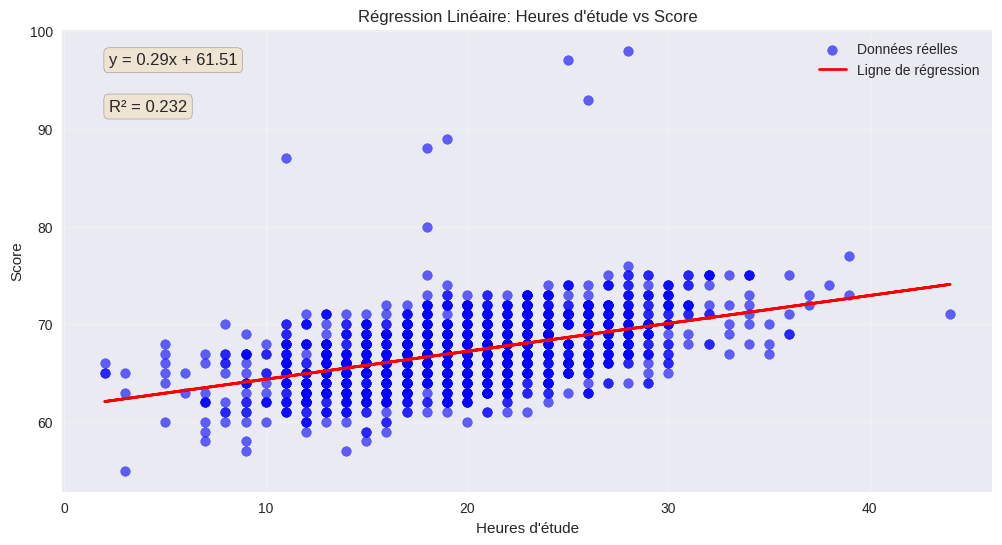

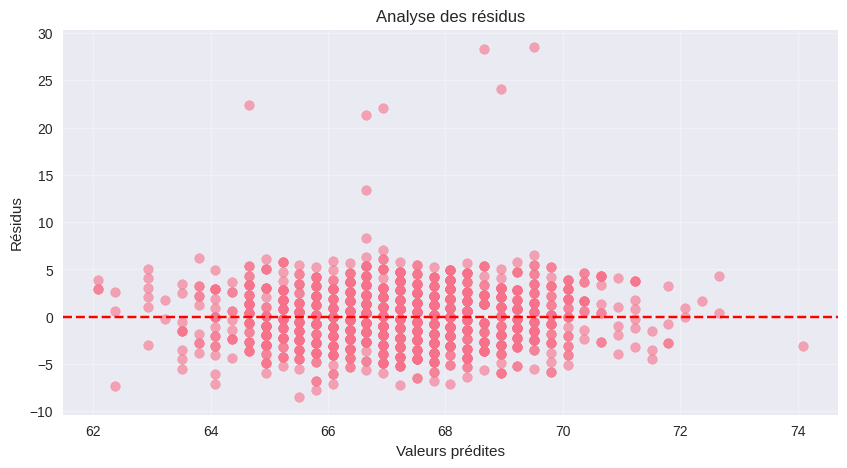

In [19]:
# =============================================================================
# VISUALISATION DES RÉSULTATS DE LA RÉGRESSION
# =============================================================================

print("\n" + "=" * 60)
print("VISUALISATION DES RÉSULTATS (MATPLOTLIB)")
print("=" * 60)

# Création de la visualisation
plt.figure(figsize=(12, 6))

# Graphique de dispersion avec ligne de régression
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Données réelles')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Ligne de régression')

plt.xlabel('Heures d\'étude')
plt.ylabel('Score')
plt.title('Régression Linéaire: Heures d\'étude vs Score')
plt.legend()
plt.grid(True, alpha=0.3)

# Ajout de l'équation de régression
equation = f'y = {lr_model.coef_[0]:.2f}x + {lr_model.intercept_:.2f}'
r2_text = f'R² = {r2:.3f}'
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.05, 0.85, r2_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

# Graphique des résidus
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Analyse des résidus')
plt.grid(True, alpha=0.3)
plt.show()


**Partie 13: Régression polynomiale (bonus)**

Cette section explore la régression polynomiale avec différents degrés pour améliorer les prédictions.


RÉGRESSION POLYNOMIALE (BONUS)
✅ Modèle polynomial degré 2 entraîné
✅ Modèle polynomial degré 3 entraîné
✅ Modèle polynomial degré 4 entraîné


,Degré,MAE,RMSE,R²
0,2,2.4448,3.2932,0.2328
1,3,2.4445,3.2930,0.2328
2,4,2.4455,3.2956,0.2317


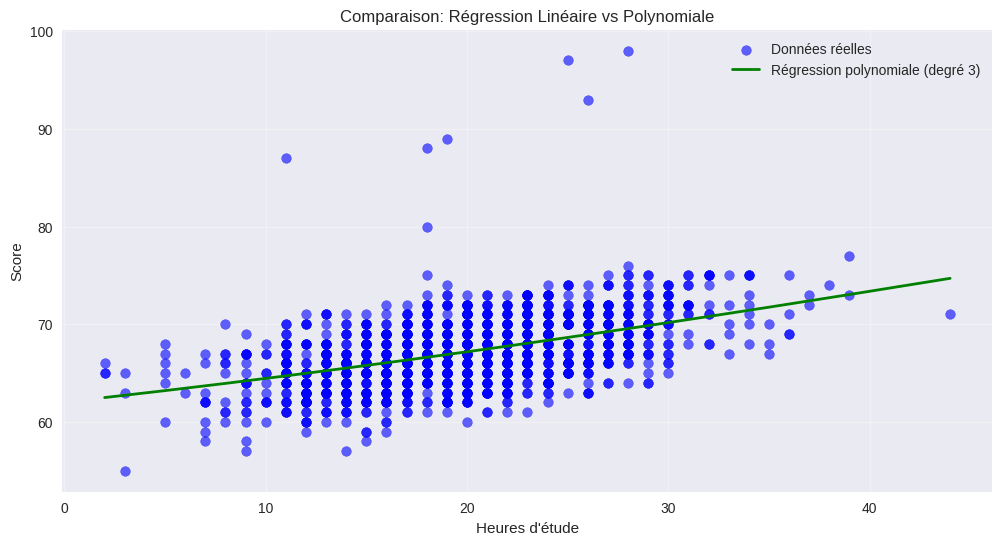

In [20]:
# =============================================================================
# RÉGRESSION POLYNOMIALE (BONUS)
# =============================================================================

print("\n" + "=" * 60)
print("RÉGRESSION POLYNOMIALE (BONUS)")
print("=" * 60)

# Essai avec différents degrés polynomiaux
degrees = [2, 3, 4]
results = []

for degree in degrees:
    # Transformation polynomiale des features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Division en ensembles d'entraînement et de test
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
        X_poly, y, test_size=0.2, random_state=42)

    # Entraînement du modèle
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train_poly)

    # Prédictions et évaluation
    y_pred_poly = poly_model.predict(X_test_poly)
    mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
    rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
    r2_poly = r2_score(y_test_poly, y_pred_poly)

    results.append({
        'Degré': degree,
        'MAE': mae_poly,
        'RMSE': rmse_poly,
        'R²': r2_poly
    })

    print(f"✅ Modèle polynomial degré {degree} entraîné")

# Affichage des résultats
results_df = pd.DataFrame(results)
display(results_df.style.format({
    'MAE': '{:.4f}',
    'RMSE': '{:.4f}',
    'R²': '{:.4f}'
}).set_caption("Performances de la régression polynomiale").highlight_min(subset=['MAE', 'RMSE'], color='lightgreen')
 .highlight_max(subset=['R²'], color='lightgreen'))

# Visualisation de la meilleure régression polynomiale
best_degree = results_df.loc[results_df['R²'].idxmax(), 'Degré']
poly_best = PolynomialFeatures(degree=int(best_degree))
X_poly_best = poly_best.fit_transform(X)
X_train_poly_best, X_test_poly_best, y_train_poly_best, y_test_poly_best = train_test_split(
    X_poly_best, y, test_size=0.2, random_state=42)

poly_model_best = LinearRegression()
poly_model_best.fit(X_train_poly_best, y_train_poly_best)
y_pred_poly_best = poly_model_best.predict(X_test_poly_best)

# Visualisation
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Données réelles')

# Trier pour une courbe lisse
X_sorted = np.sort(X_test.values.flatten())
X_sorted_poly = poly_best.transform(X_sorted.reshape(-1, 1))
y_sorted_poly = poly_model_best.predict(X_sorted_poly)

plt.plot(X_sorted, y_sorted_poly, color='green', linewidth=2,
         label=f'Régression polynomiale (degré {best_degree})')

plt.xlabel('Heures d\'étude')
plt.ylabel('Score')
plt.title('Comparaison: Régression Linéaire vs Polynomiale')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Partie 14: Expérimentation avec différentes combinaisons de caractéristiques (bonus)**

Cette section teste différentes combinaisons de variables pour améliorer la performance du modèle.

In [22]:
# =============================================================================
# EXPÉRIMENTATION AVEC DIFFÉRENTES COMBINAISONS DE CARACTÉRISTIQUES (BONUS)
# =============================================================================

print("\n" + "=" * 60)
print("EXPÉRIMENTATION AVEC DIFFÉRENTES COMBINAISONS DE CARACTÉRISTIQUES (BONUS)")
print("=" * 60)

# Préparation des données pour la régression multiple
X_multi = df_clean.drop(columns=[target_col])
y_multi = df_clean[target_col]

# Normalisation des données
scaler = StandardScaler()
X_multi_scaled = scaler.fit_transform(X_multi)
X_multi_scaled = pd.DataFrame(X_multi_scaled, columns=X_multi.columns)

# Division en ensembles d'entraînement et de test
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi_scaled, y_multi, test_size=0.2, random_state=42)

# Différentes combinaisons de caractéristiques à tester
feature_combinations = [
    [study_col],  # Seulement les heures d'étude
    [study_col, 'Sleep_Hours'] if 'Sleep_Hours' in X_multi.columns else [study_col, 'sleep_hours'],
    [study_col, 'Previous_Scores'] if 'Previous_Scores' in X_multi.columns else [study_col],
    [study_col, 'Attendance'] if 'Attendance' in X_multi.columns else [study_col],
    list(X_multi.columns)  # Toutes les caractéristiques
]

combination_names = [
    "Heures d'étude seulement",
    "Heures d'étude + Sommeil",
    "Heures d'étude + Scores précédents",
    "Heures d'étude + Participation",
    "Toutes les caractéristiques"
]

# Entraînement et évaluation des différents modèles
multi_results = []

for i, features in enumerate(feature_combinations):
    # Vérifier que les features existent dans le dataset
    available_features = [f for f in features if f in X_train_multi.columns]
    if not available_features:
        continue

    X_train_sub = X_train_multi[available_features]
    X_test_sub = X_test_multi[available_features]

    # Entraînement du modèle
    lr_multi = LinearRegression()
    lr_multi.fit(X_train_sub, y_train_multi)

    # Prédictions et évaluation
    y_pred_multi = lr_multi.predict(X_test_sub)
    mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
    rmse_multi = np.sqrt(mean_squared_error(y_test_multi, y_pred_multi))
    r2_multi = r2_score(y_test_multi, y_pred_multi)

    multi_results.append({
        'Combinaison': combination_names[i],
        'Features': ', '.join(available_features),
        'MAE': mae_multi,
        'RMSE': rmse_multi,
        'R²': r2_multi
    })

# Affichage des résultats
multi_results_df = pd.DataFrame(multi_results)
display(multi_results_df.style.format({
    'MAE': '{:.4f}',
    'RMSE': '{:.4f}',
    'R²': '{:.4f}'
}).set_caption("Comparaison des combinaisons de caractéristiques")
 .highlight_min(subset=['MAE', 'RMSE'], color='lightgreen')
 .highlight_max(subset=['R²'], color='lightgreen'))


EXPÉRIMENTATION AVEC DIFFÉRENTES COMBINAISONS DE CARACTÉRISTIQUES (BONUS)


,Combinaison,Features,MAE,RMSE,R²
0,Heures d'étude seulement,Hours_Studied,2.4476,3.2948,0.2320
1,Heures d'étude + Sommeil,"Hours_Studied, Sleep_Hours",2.4532,3.3013,0.2290
2,Heures d'étude + Scores précédents,"Hours_Studied, Previous_Scores",2.4073,3.2471,0.2541
3,Heures d'étude + Participation,"Hours_Studied, Attendance",1.4690,2.4102,0.5890
4,Toutes les caractéristiques,"Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender",1.0155,2.0974,0.6888


**Partie 15: Sélection des meilleures caractéristiques**

Cette section utilise des techniques statistiques pour identifier les variables les plus importantes.


SÉLECTION DES MEILLEURES CARACTÉRISTIQUES
📊 Scores d'importance des caractéristiques:


,Feature,Score,P-value
1,Attendance,3366.99,0.0000e+00
0,Hours_Studied,1635.08,1.2863e-319
6,Previous_Scores,208.86,1.2444e-46
9,Tutoring_Sessions,165.89,1.6508e-37
13,Peer_Influence,67.01,3.2153e-16
2,Parental_Involvement,59.25,1.5937e-14
3,Access_to_Resources,54.55,1.7049e-13
17,Distance_from_Home,52.66,4.4253e-13
15,Learning_Disabilities,48.14,4.3386e-12
4,Extracurricular_Activities,27.49,1.6267e-07


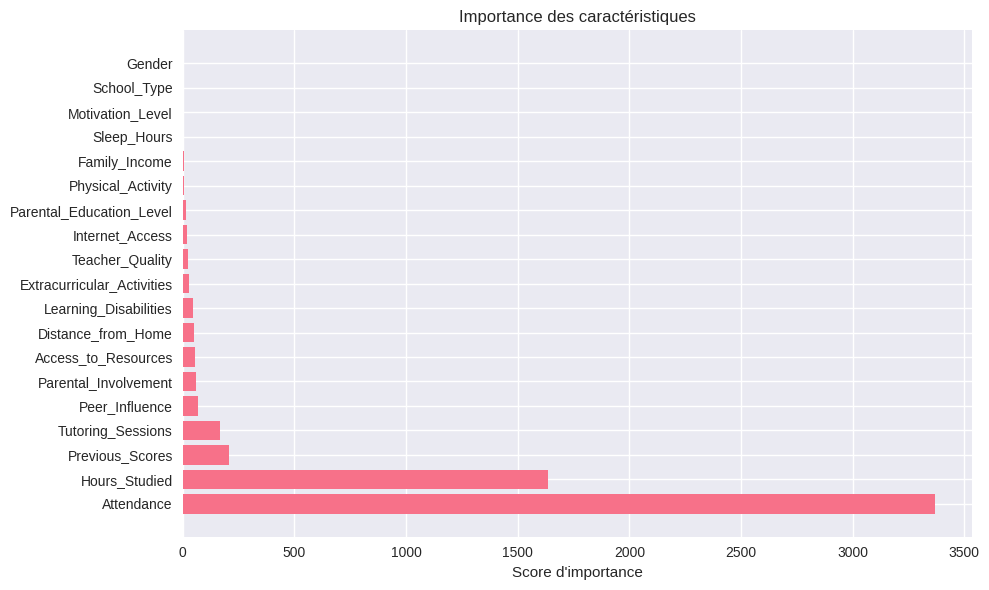

In [23]:
# =============================================================================
# SÉLECTION DES MEILLEURES CARACTÉRISTIQUES
# =============================================================================

print("\n" + "=" * 60)
print("SÉLECTION DES MEILLEURES CARACTÉRISTIQUES")
print("=" * 60)

# Utilisation de SelectKBest pour identifier les meilleures features
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_multi_scaled, y_multi)

# Création d'un DataFrame avec les scores
feature_scores = pd.DataFrame({
    'Feature': X_multi_scaled.columns,
    'Score': selector.scores_,
    'P-value': selector.pvalues_
}).sort_values('Score', ascending=False)

print("📊 Scores d'importance des caractéristiques:")
display(feature_scores.style.format({
    'Score': '{:.2f}',
    'P-value': '{:.4e}'
}).set_caption("Importance des caractéristiques (F-regression)")
 .background_gradient(subset=['Score'], cmap='YlOrRd'))

# Visualisation de l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(feature_scores['Feature'], feature_scores['Score'])
plt.xlabel('Score d\'importance')
plt.title('Importance des caractéristiques')
plt.tight_layout()
plt.show()

**Partie 16: Conclusion et comparaison finale**

Cette section conclut l'analyse en comparant tous les modèles testés et en fournissant des recommandations.

In [30]:
# =============================================================================
# CONCLUSION ET COMPARAISON FINALE
# =============================================================================

print("\n" + "=" * 60)
print("CONCLUSION ET COMPARAISON FINALE")
print("=" * 60)

# Comparaison de tous les modèles
final_comparison = pd.DataFrame({
    'Modèle': ['Régression Linéaire Simple', 'Régression Polynomiale (meilleur)'],
    'MAE': [mae, results_df.loc[results_df['R²'].idxmax(), 'MAE']],
    'RMSE': [rmse, results_df.loc[results_df['R²'].idxmax(), 'RMSE']],
    'R²': [r2, results_df.loc[results_df['R²'].idxmax(), 'R²']]
})

# Ajouter le meilleur modèle multiple
best_multi = multi_results_df.loc[multi_results_df['R²'].idxmax()]
final_comparison.loc[2] = ['Régression Multiple (meilleur)', best_multi['MAE'], best_multi['RMSE'], best_multi['R²']]

display(final_comparison.style.format({
    'MAE': '{:.4f}',
    'RMSE': '{:.4f}',
    'R²': '{:.4f}'
}).set_caption("Comparaison finale des modèles")
 .highlight_min(subset=['MAE', 'RMSE'], color='lightgreen')
 .highlight_max(subset=['R²'], color='lightgreen'))

print(f"""
🎯 SYNTHÈSE DES RÉSULTATS:

1. RÉGRESSION LINÉAIRE SIMPLE:
   - Performance: R² = {r2:.4f}, RMSE = {rmse:.4f}
   - Relation: Chaque heure d'étude supplémentaire est associée à une augmentation de {lr_model.coef_[0]:.2f} points

2. RÉGRESSION POLYNOMIALE:
   - Meilleur degré: {best_degree}
   - Performance: R² = {results_df.loc[results_df['R²'].idxmax(), 'R²']:.4f}

3. RÉGRESSION MULTIPLE:
   - Meilleure combinaison: {best_multi['Combinaison']}
   - Performance: R² = {best_multi['R²']:.4f}

4. CARACTÉRISTIQUES LES PLUS IMPORTANTES:
   - 1. {feature_scores.iloc[0]['Feature']} (score: {feature_scores.iloc[0]['Score']:.2f})
   - 2. {feature_scores.iloc[1]['Feature']} (score: {feature_scores.iloc[1]['Score']:.2f})
   - 3. {feature_scores.iloc[2]['Feature']} (score: {feature_scores.iloc[2]['Score']:.2f})
""")




CONCLUSION ET COMPARAISON FINALE


,Modèle,MAE,RMSE,R²
0,Régression Linéaire Simple,2.4476,3.2948,0.2320
1,Régression Polynomiale (meilleur),2.4445,3.2930,0.2328
2,Régression Multiple (meilleur),1.0155,2.0974,0.6888



🎯 SYNTHÈSE DES RÉSULTATS:

1. RÉGRESSION LINÉAIRE SIMPLE:
   - Performance: R² = 0.2320, RMSE = 3.2948
   - Relation: Chaque heure d'étude supplémentaire est associée à une augmentation de 0.29 points

2. RÉGRESSION POLYNOMIALE:
   - Meilleur degré: 3
   - Performance: R² = 0.2328

3. RÉGRESSION MULTIPLE:
   - Meilleure combinaison: Toutes les caractéristiques
   - Performance: R² = 0.6888

4. CARACTÉRISTIQUES LES PLUS IMPORTANTES:
   - 1. Attendance (score: 3366.99)
   - 2. Hours_Studied (score: 1635.08)
   - 3. Previous_Scores (score: 208.86)

